_____________
# 02. Modeling AddClicks - `Logistic Regression Example`
The following notebook contains code examples for advertisement click modeling using Logistic Regression. 

<img src="img/logr.png" style="width: 700px;"/>

You may want to check the links below learn more about the method:
- [Logistic Regression tutorial for Dummies](https://towardsdatascience.com/logistic-regression-explained-9ee73cede081) with references to Linear Regression and Maximum Likelihood Estimation (MLE).
- Logistic Regression with a [code example](https://www.kdnuggets.com/2020/03/linear-logistic-regression-explained.html) from KDNuggets.
_______________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Exploration

In [2]:
ad_data = pd.read_csv('data/advertising.csv', low_memory=False)
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [3]:
ad_data.head(3).T

,0,1,2
Daily Time Spent on Site,68.95,80.23,69.47
Age,35,31,26
Area Income,61833.9,68441.9,59785.9
Daily Internet Usage,256.09,193.77,236.5
Ad Topic Line,Cloned 5thgeneration orchestration,Monitored national standardization,Organic bottom-line service-desk
City,Wrightburgh,West Jodi,Davidton
Male,0,1,0
Country,Tunisia,Nauru,San Marino
Timestamp,2016-03-27 00:53:11,2016-04-04 01:39:02,2016-03-13 20:35:42
Clicked on Ad,0,0,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
sns.set_style('whitegrid')

Text(0.5,0,'Age')

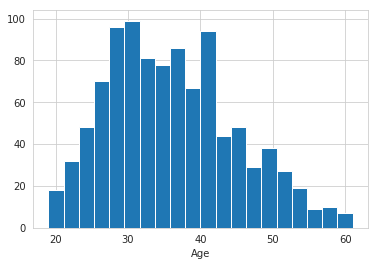

In [7]:
ad_data['Age'].hist(bins=20)
plt.xlabel('Age')

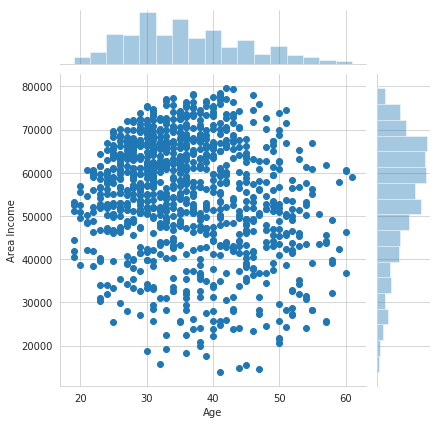

In [8]:
sns.jointplot(data=ad_data, x='Age', y='Area Income')

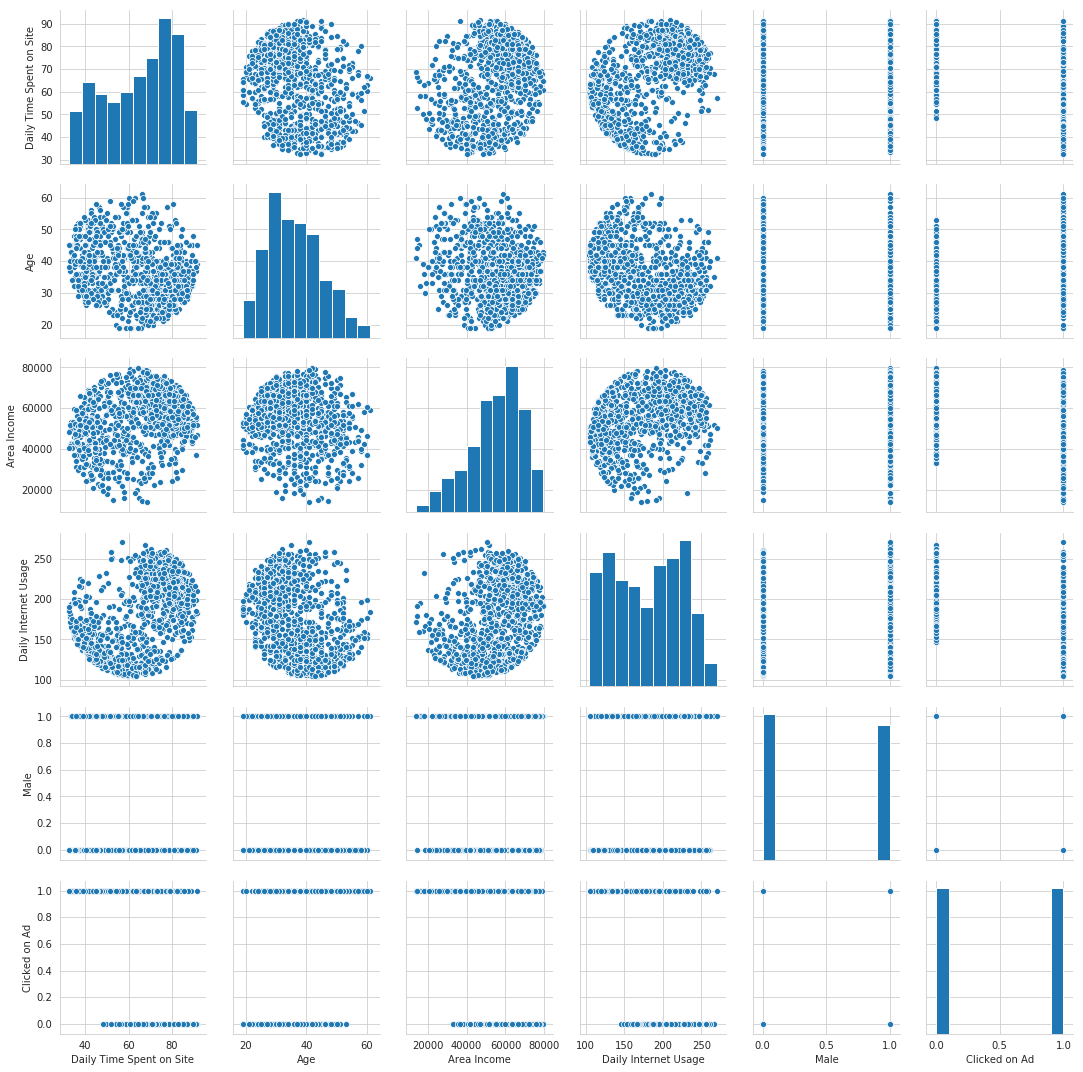

In [9]:
sns.pairplot(ad_data)

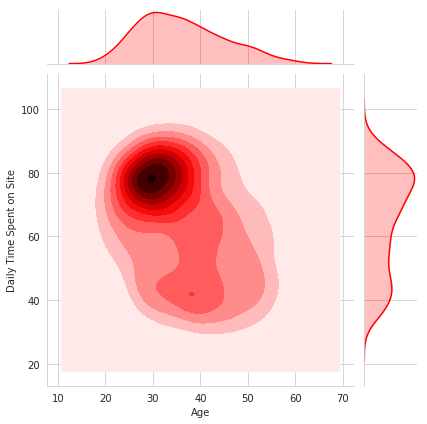

In [10]:
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', color='red', kind='kde')

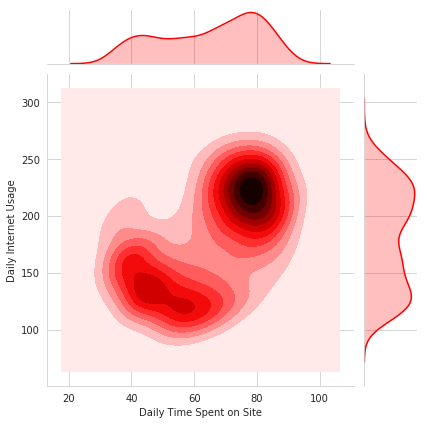

In [11]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color='red', kind='kde')

### Feature Selection & Train Test Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [14]:
all_features = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(
    all_features, ad_data['Clicked on Ad'], test_size=0.2, random_state=42)

In [16]:
[x.shape for x in (train_data, test_data, train_labels, test_labels)]

[(800, 5), (200, 5), (800,), (200,)]

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [19]:
model.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Inference

In [20]:
model.coef_, model.intercept_

(array([[-5.55704954e-02,  2.61911546e-01, -1.53274922e-05,
         -2.70202278e-02,  1.79079055e-03]]), array([0.00552637]))

In [21]:
test_predictions = model.predict(test_data)

## Evaluation (Precision | Recall | F1)

<img src="img/pr3.png" style="width: 600px;"/>

_____________

<img src="img/pr2.png" style="width: 800px;"/>

________

<img src="img/pr.png" style="width: 800px;"/>

________

***F1*** score combines both precision and recall by calculating their harmonic mean. Check this [gif](https://pmirla.github.io/assets/harmonic_mean.gif) for more info.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [34]:
print(confusion_matrix(test_labels, test_predictions))

[[85  4]
 [16 95]]
